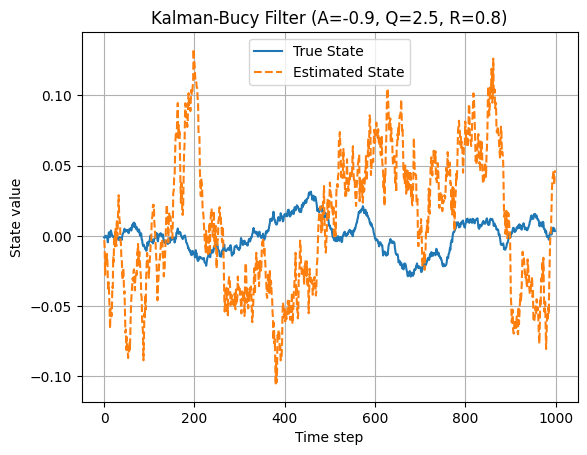

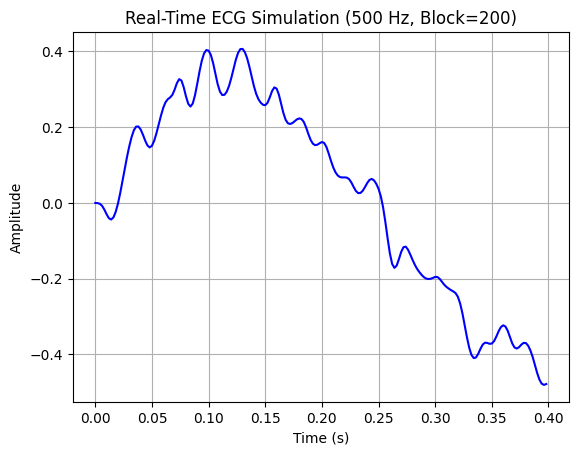

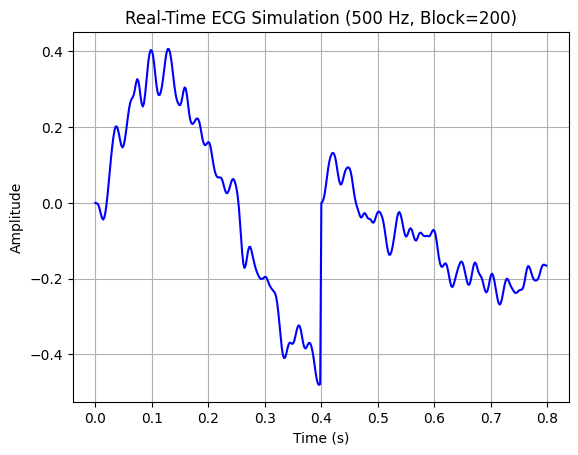

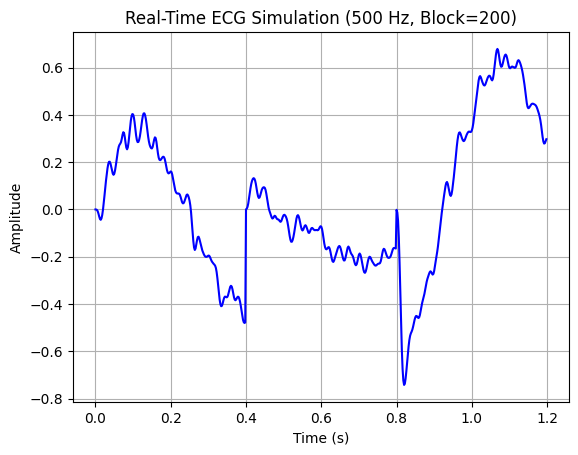

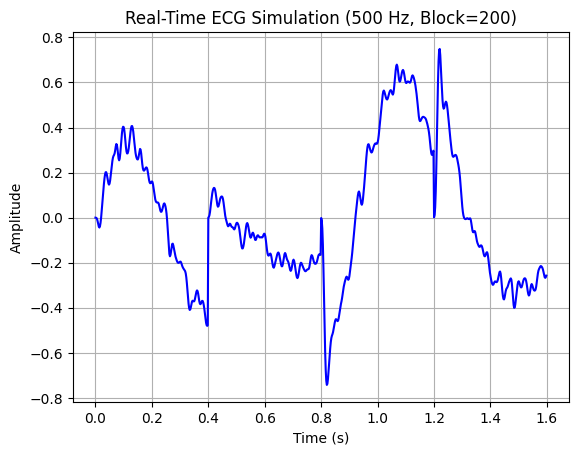

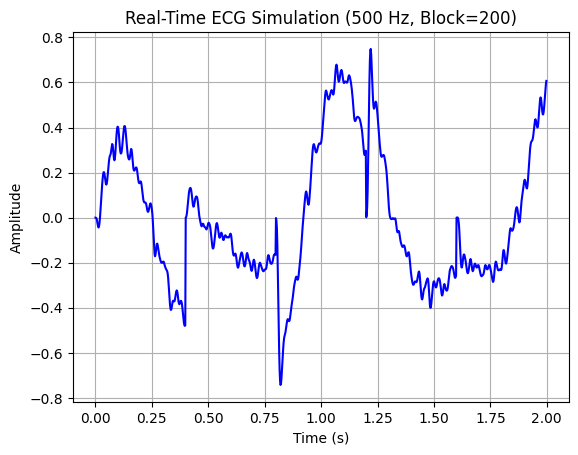

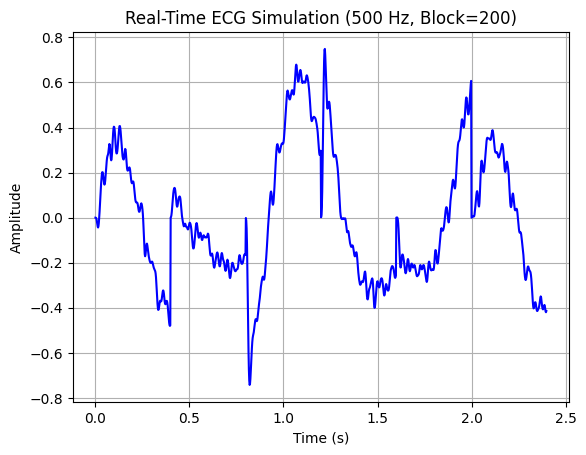

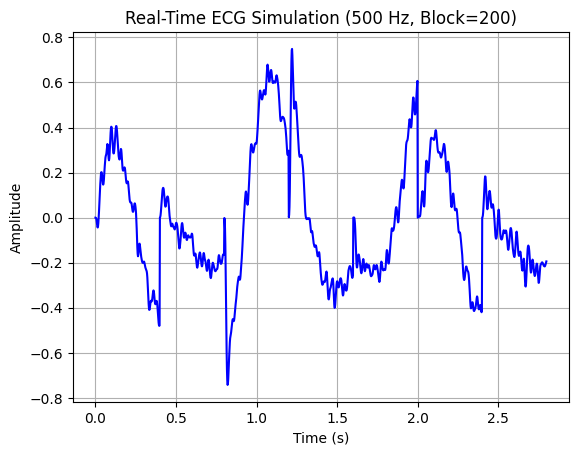

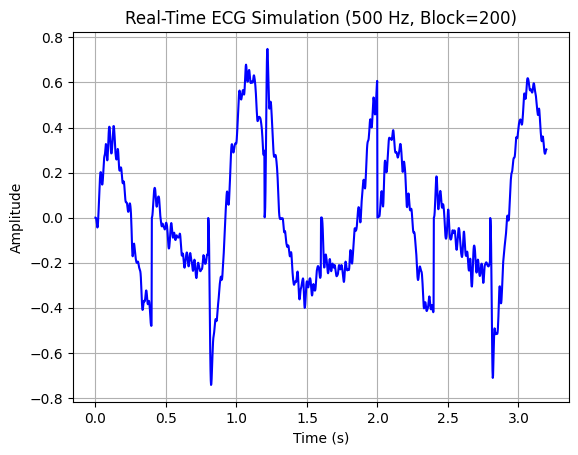

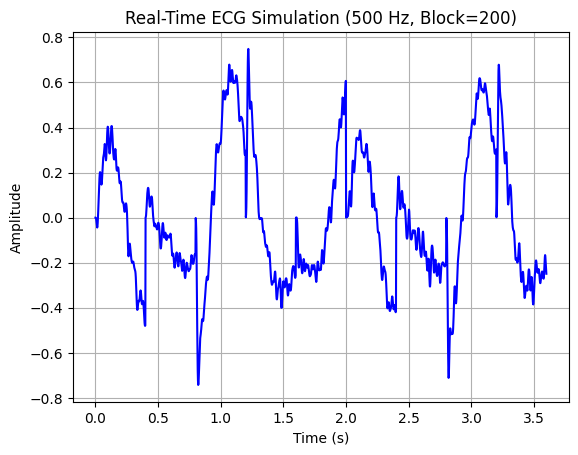

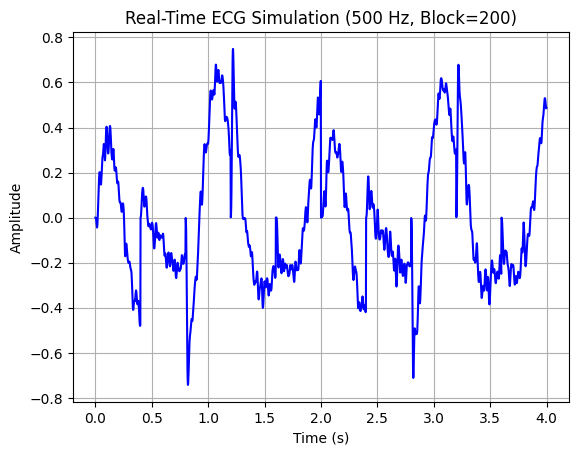

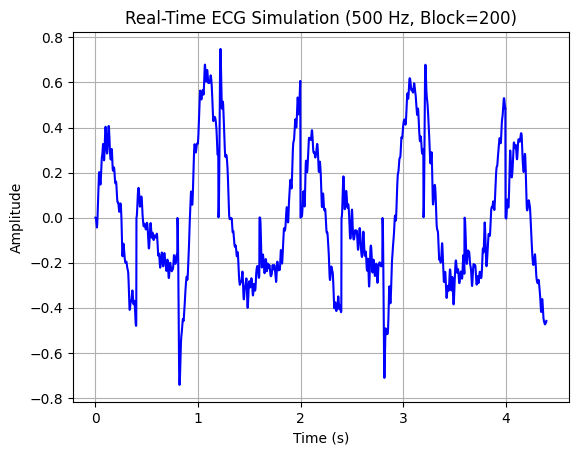

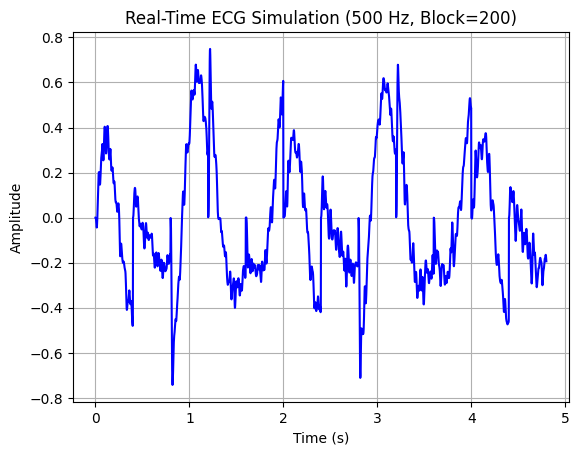

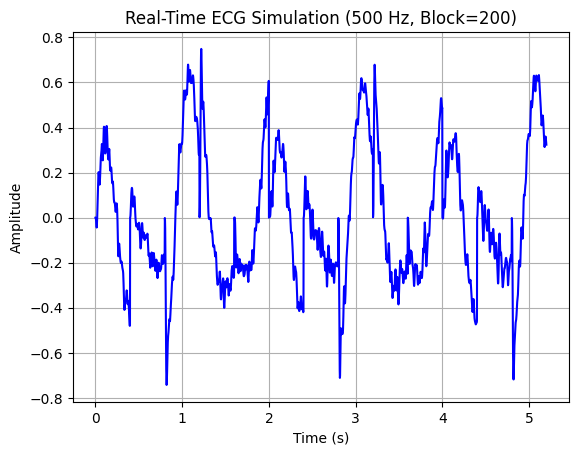

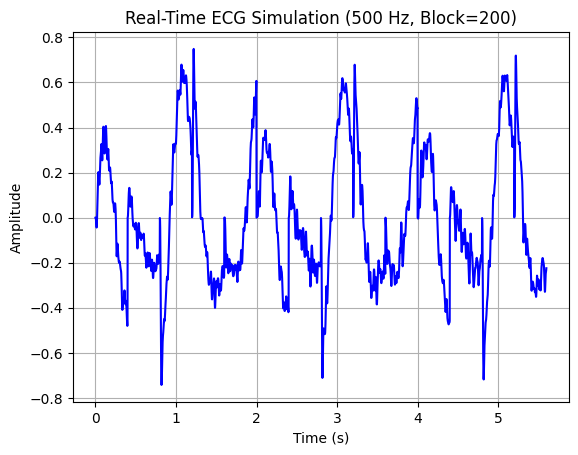

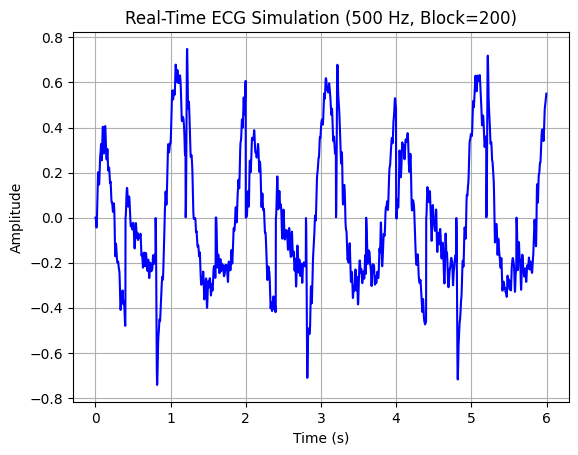

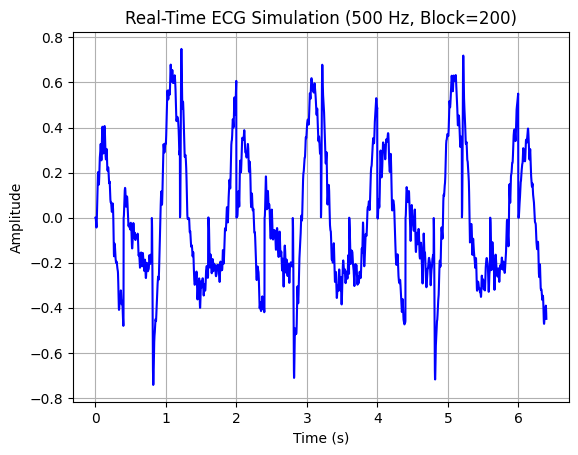

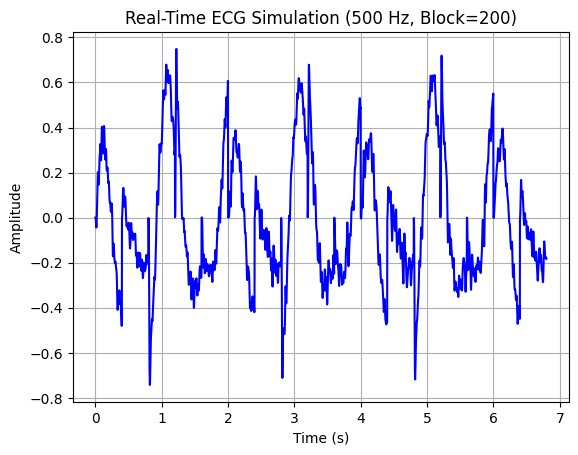

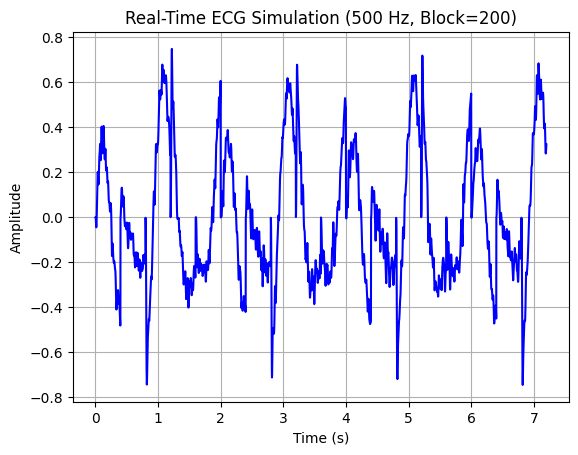

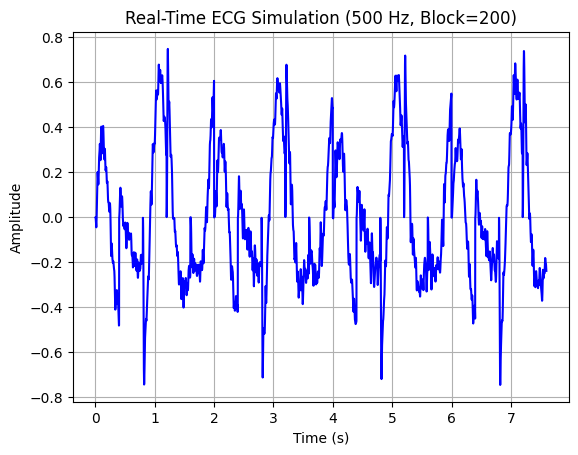

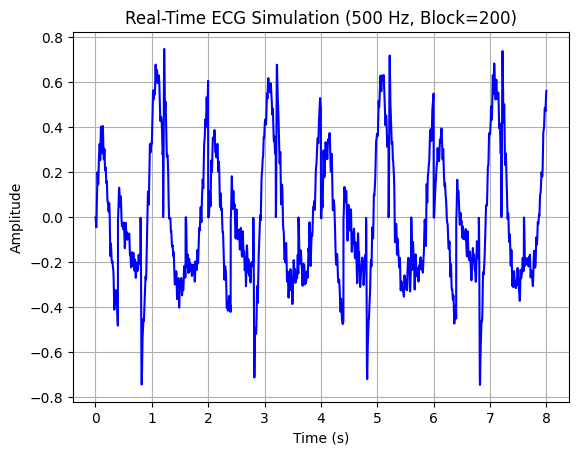

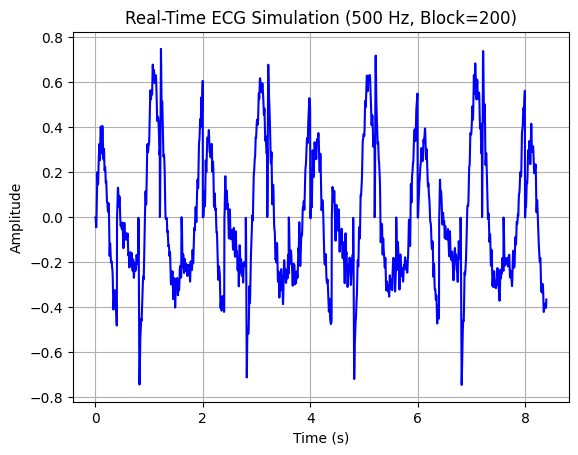

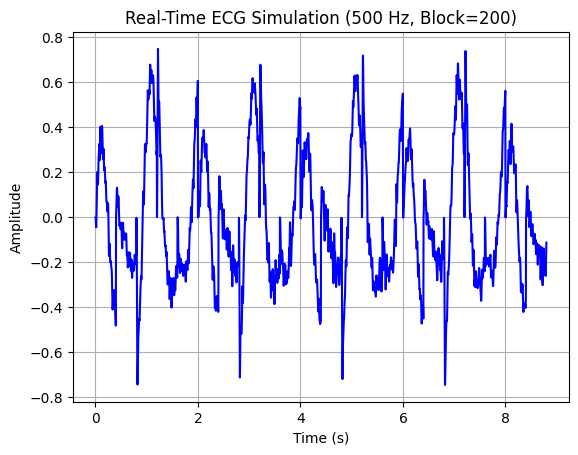

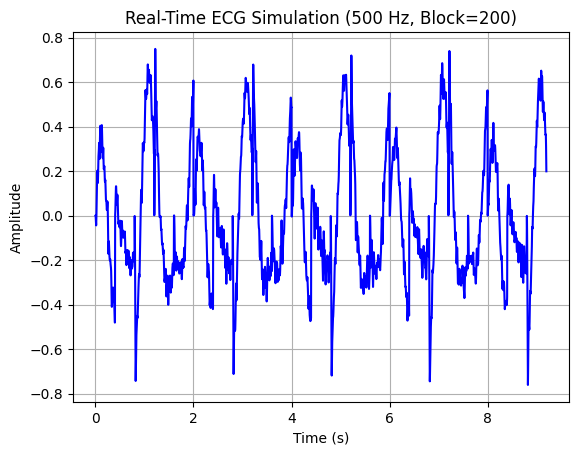

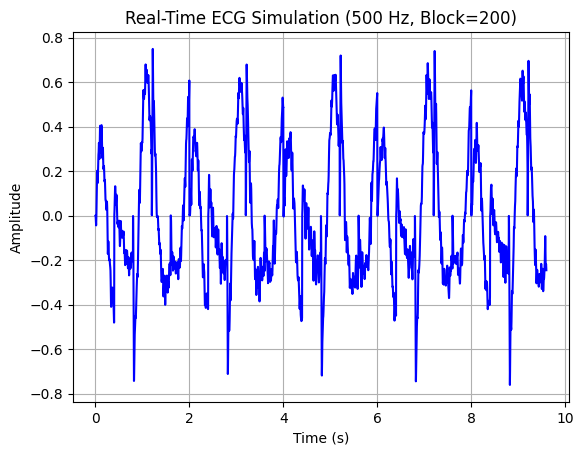

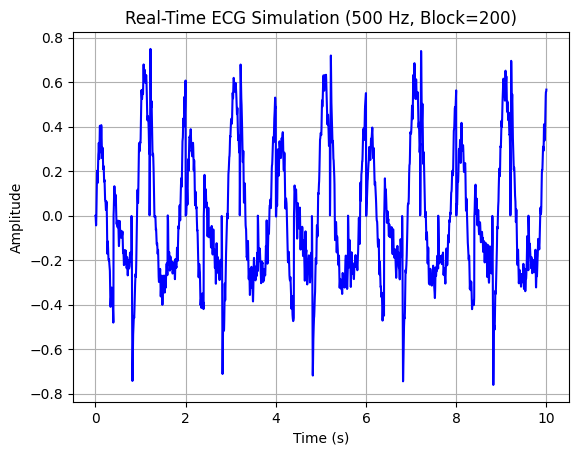

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
import time  # Added missing import
# 1. Synthetic ECG Generation
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01
T = 10
N = int(T / dt)

# System parameters
A = -0.9
C = 1
Q = 2.5
R = 0.8

# Initial conditions
x_true = 0.0
x_hat = 0.0
P = 1.0

x_history = []
xhat_history = []

for k in range(N):
    # True system (simulate with noise)
    w = np.random.normal(0, np.sqrt(Q * dt))
    x_true += dt * (A * x_true + w)

    # Measurement (with noise)
    v = np.random.normal(0, np.sqrt(R))
    y = C * x_true + v

    # Kalman-Bucy update
    K = P * C / R
    x_hat += dt * (A * x_hat + K * (y - C * x_hat))
    P += dt * (2 * A * P + Q - K * C * P)

    x_history.append(x_true)
    xhat_history.append(x_hat)

# Plot results
plt.figure()
plt.plot(x_history, label="True State")
plt.plot(xhat_history, '--', label="Estimated State")
plt.xlabel("Time step")
plt.ylabel("State value")
plt.title("Kalman-Bucy Filter (A=-0.9, Q=2.5, R=0.8)")
plt.legend()
plt.grid()
plt.show()





def synthetic_ecg(fs, duration, heart_rate=60):
    t = np.linspace(0, duration, int(fs * duration))
    ecg = 0.6 * np.sin(2 * np.pi * heart_rate/60 * t) \
          + 0.2 * np.sin(2 * np.pi * 2 * heart_rate/60 * t) \
          + 0.1 * np.random.randn(len(t))  # Noise
    return t, ecg

# 2. Bandpass Filter (0.5–40 Hz)
def bandpass_filter(signal, fs, lowcut=0.5, highcut=40.0, order=4):
    nyq = 0.5 * fs
    low, high = lowcut / nyq, highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, signal)

# 3. Real-Time Simulation
def simulate_real_time_processing(ecg_signal, fs, block_size=200):
    total_samples = len(ecg_signal)
    num_blocks = total_samples // block_size
    processed_signal = []
    t_axis = []

    plt.figure()
    for i in range(num_blocks):
        block = ecg_signal[i*block_size:(i+1)*block_size]
        filtered = bandpass_filter(block, fs)
        processed_signal.extend(filtered)
        t_axis.extend(np.arange(i*block_size, (i+1)*block_size)/fs)

        # Dynamic plot (optional)
        plt.clf()
        plt.plot(t_axis, processed_signal, 'b', label="Filtered ECG")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title("Real-Time ECG Simulation (500 Hz, Block=200)")
        plt.grid(True)
        plt.pause(0.01)
        time.sleep(block_size/fs)  # Simulate delay

    plt.show()

# Run simulation
fs = 500
duration = 10
t, ecg = synthetic_ecg(fs, duration)
simulate_real_time_processing(ecg, fs, block_size=200)